In [35]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *

import scienceplots


In [39]:
observed_path = "/media/advait/DATA/research/rcb-project/TSFitPy/input_files/observed_spectra"
star = "HD137613"
observed_file = f"{observed_path}/{star}.txt"
observed_data = np.loadtxt(observed_file, unpack=True)
obs_wave, obs_flux = observed_data[0], observed_data[1]
obs_err = observed_data[2]

Text(0.5, 1.0, 'HD137613')

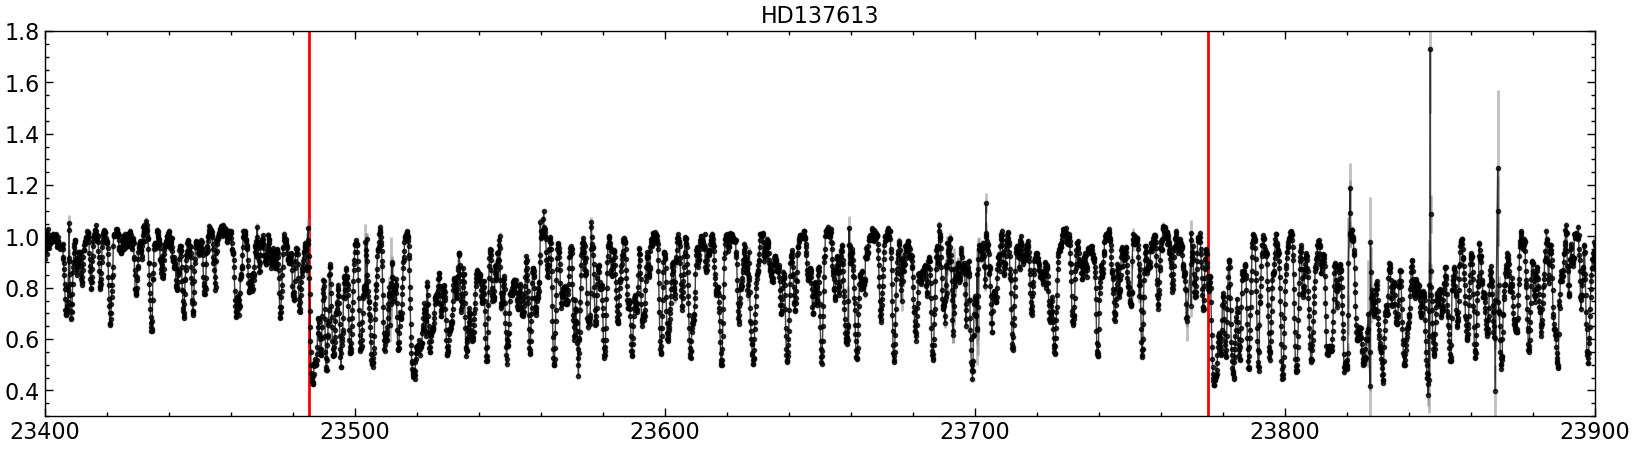

In [41]:
plt.figure(figsize=(20, 5))
plt.xlim(23400, 23900)
plt.ylim(0.3, 1.8)
plt.axvline(2.3485e4, color= 'r')
plt.axvline(2.3775e4, color= 'r')
plt.errorbar(obs_wave, obs_flux, yerr=obs_err, fmt="none", ecolor="gray", alpha=0.5)
plt.plot(obs_wave, obs_flux, "k.-", alpha=0.75, lw =1 ,  label="Observed")

plt.title(f"{star}")

Trimming
Trimming done
Running TS
TS completed


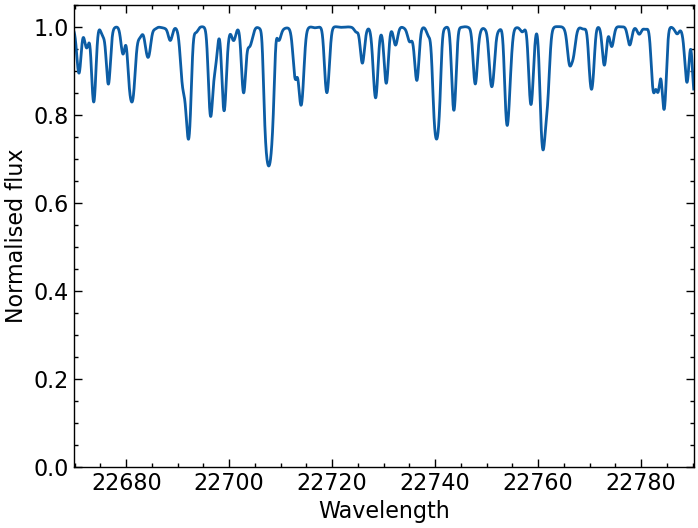

In [9]:

plt.style.use('science')
plt.style.use('notebook')

turbospectrum_paths = {"turbospec_path": "../turbospectrum/exec-ifx/",  # change to /exec-gf/ if gnu compiler
                       "interpol_path": "../scripts/model_interpolators/",
                       "model_atom_path": "../input_files/nlte_data/model_atoms/",
                       "departure_file_path": "../input_files/nlte_data/",
                    #    "model_atmosphere_grid_path": "../input_files/test_model_atmospheres/",
                        "model_atmosphere_grid_path": "../input_files/hdc_model_atmospheres/",
                       "line_list_path": "../input_files/linelists/linelist_4500K/"}

teff = 5250.0
logg = 0.5
met = 0.0
vmic = 6.5
lmin = 22670
lmax = 22790
ldelta = 0.01
atmosphere_type = "1D"   # "1D" or "3D"
nlte_flag = False
elements_in_nlte = ["Fe", "Mg"]  # can choose several elements, used ONLY if nlte_flag = True
nguess = 8.5
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.5-8.56, "N" : nguess-7.98, "O" : 8.8-8.77, "Na" : 6.9-6.29}  # elemental abundances [X/Fe]; if not written solar scaled ones are used
include_molecules = True  # way faster without them

# plots the data, but can also save it for later use
wavelength, flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules, resolution=75000, macro=0, rotation=0)
# /home/advait/Desktop/research/rcb-project/TSFitPy/input_files/hdc_model_atmospheres/1D/s5500_g+0.5_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.mod

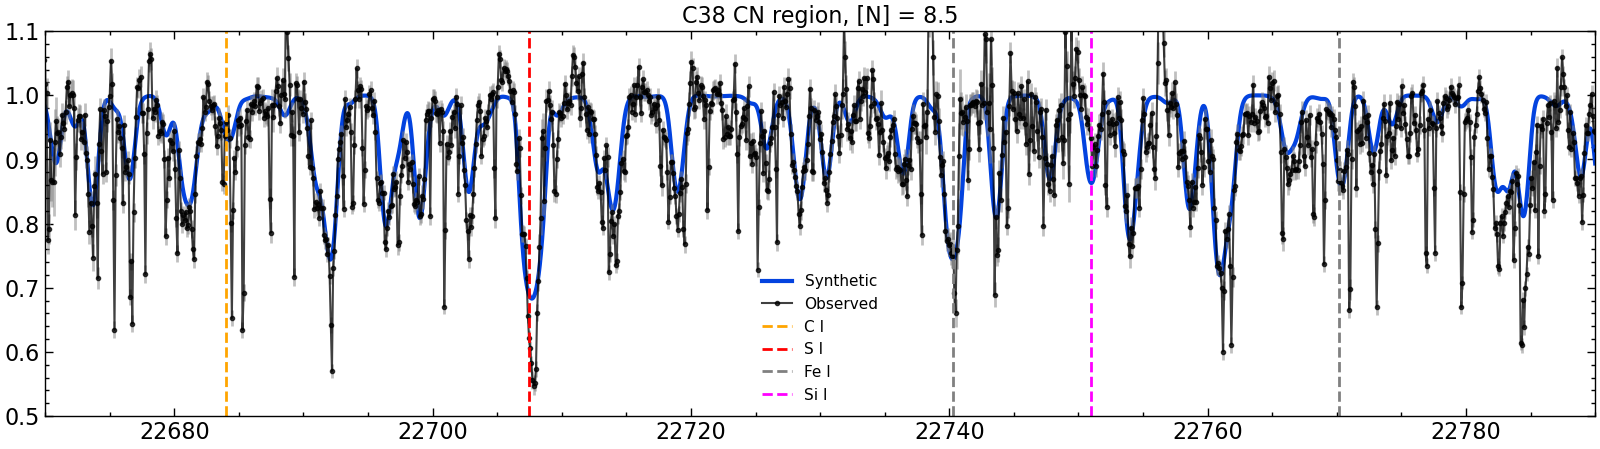

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(wavelength, flux, 'xkcd:blue', lw = 3,  label="Synthetic")

plt.errorbar(obs_wave, obs_flux, yerr=obs_err, fmt="none", ecolor="gray", alpha=0.5)
plt.plot(obs_wave, obs_flux, "k.-", alpha=0.75, lw =1.5 ,  label="Observed")
plt.xlim(lmin, lmax)
plt.ylim(0.5, 1.1)
plt.axvline(22684, ls="--", color="orange", label="C I")
plt.axvline(22707.5, ls="--", color="red", label="S I")
plt.axvline(22740.3, ls="--", color="gray", label="Fe I")
plt.axvline(22770.2, ls="--", color="gray")
plt.axvline(22751, ls="--", color="magenta", label="Si I")
plt.title(f"{star} CN region, [N] = {nguess}")
plt.legend(fontsize=11)

Trimming
Trimming done
Running TS
TS completed


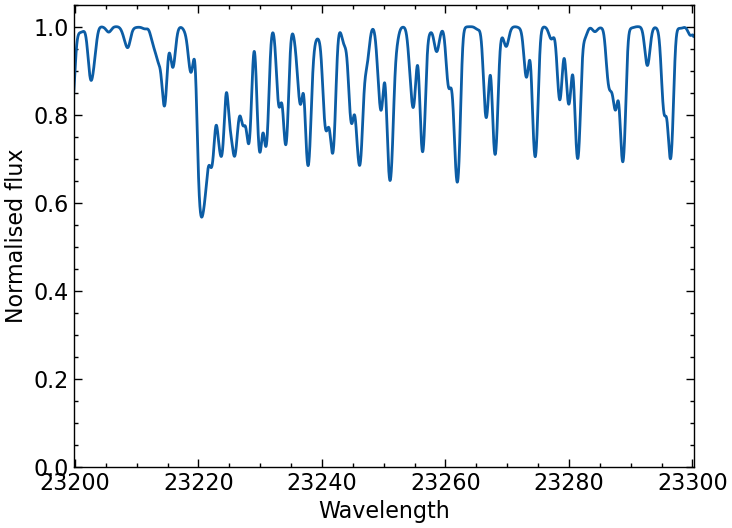

In [30]:
lmin = 23200
lmax = 23300
free_isotopes = {"8.016" : 0.45, "8.017": 0.0, "8.018": 0.55}
oguess = 8.0
element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.5-8.56, "N" : 8.3-7.98, "O" : oguess-8.77, "Na" : 6.9-6.29} 
vmic = 6.5
wavelength, flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules, free_isotopes, resolution=75000, macro=0, rotation=0)

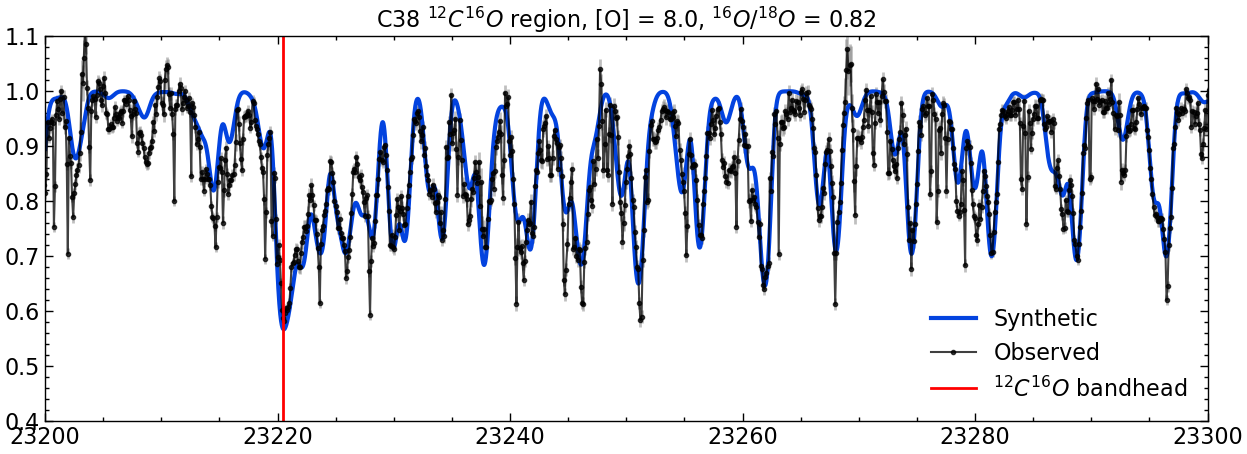

In [31]:
plt.figure(figsize=(15, 5))
# plt.axvline(22949.5, color='r', linestyle='--')
plt.errorbar(obs_wave, obs_flux, yerr=obs_err, fmt="none", ecolor="gray", alpha=0.5)
# plt.axvline(22949.5, color='r', linestyle='--')
plt.plot(wavelength, flux, 'xkcd:blue', lw = 3,  label="Synthetic")
plt.plot(obs_wave, obs_flux, "k.-", alpha=0.75, lw =1.5 ,  label="Observed")
plt.xlim(lmin, lmax)
plt.axvline(23220.5, c = 'r', label = "$^{12}C^{16}O$ bandhead")
plt.title(fr"{star} $^{{12}}C^{{16}}O$ region, [O] = {oguess}, $^{{16}}O/^{{18}}O$ = {round(free_isotopes['8.016']/free_isotopes['8.018'],2)}")
plt.ylim(0.4, 1.1)
plt.legend()

Trimming
Trimming done
Running TS
TS completed


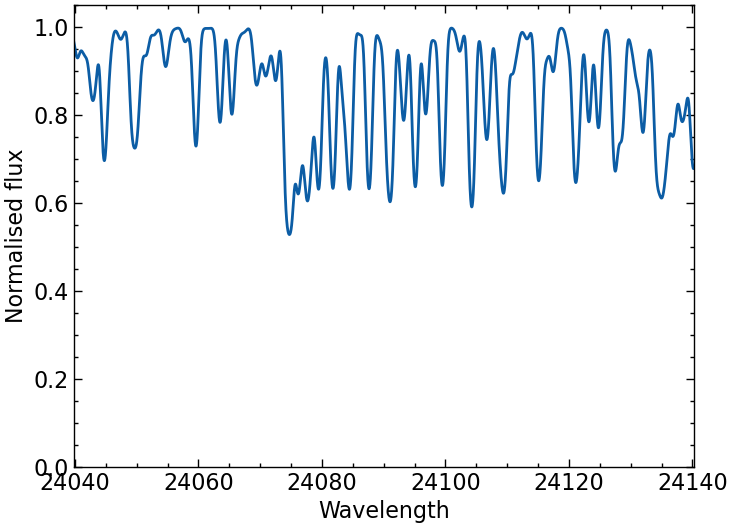

In [32]:
lmin = 24040
lmax = 24140
# free_isotopes = {"8.016" : 0.5, "8.017": 0.0, "8.018": 0.5}
# element_abundances ={"H" : 7.5-12, "He" : 11.5-10.93, "C" : 9.5-8.56, "N" : 8.3-7.98, "O" : 7.5+0.3-8.77, "Na" : 6.9-6.29} 
vmic = 6.5
wavelength, flux = plot_synthetic_data(turbospectrum_paths, teff, logg, met, vmic, lmin, lmax, ldelta, atmosphere_type, nlte_flag, elements_in_nlte, element_abundances, include_molecules, free_isotopes, resolution=75000, macro=0, rotation=0)

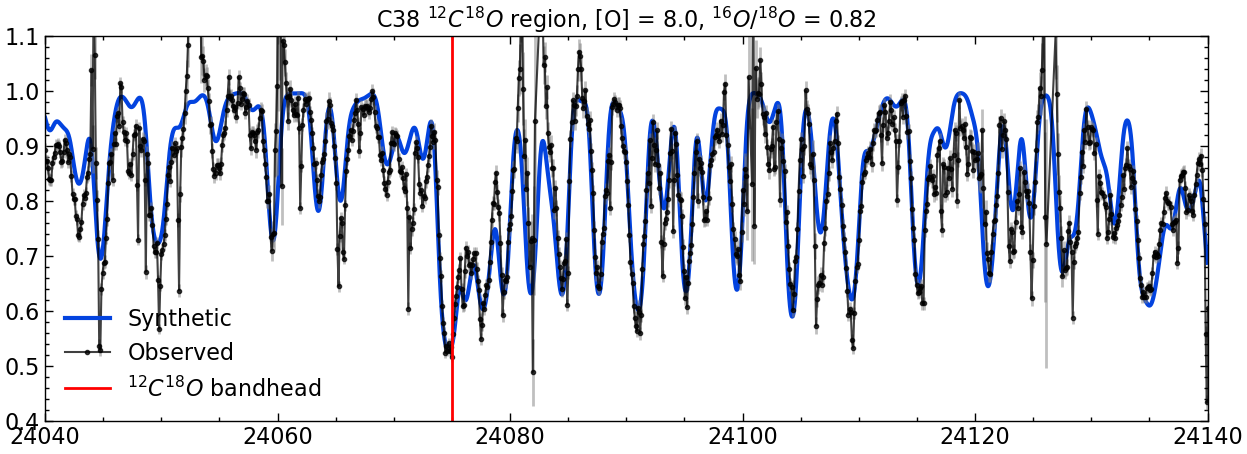

In [34]:
plt.figure(figsize=(15, 5))
plt.plot(wavelength, flux, 'xkcd:blue', lw = 3,  label="Synthetic")
plt.errorbar(obs_wave, obs_flux, yerr=obs_err, fmt="none", ecolor="gray", alpha=0.5)
plt.plot(obs_wave, obs_flux, "k.-", alpha=0.75, lw =1.5 ,  label="Observed")
plt.xlim(lmin, lmax)
plt.ylim(0.4, 1.1)
plt.axvline(24075, c= 'r', label = "$^{12}C^{18}O$ bandhead")
plt.title(fr"{star} $^{{12}}C^{{18}}O$ region, [O] = {oguess}, $^{{16}}O/^{{18}}O$ = {round(free_isotopes['8.016']/free_isotopes['8.018'],2)}")

plt.legend()